In [ ]:
#! usr/bin/env python3

## Code for scraping reddit data from:
http://www.storybench.org/how-to-scrape-reddit-with-python/

## Set up reddit connection

In [414]:
import praw
import pandas as pd
import datetime as dt
from wordcloud import WordCloud
import PIL
import itertools
import matplotlib.pyplot as plt
import re
import operator
import numpy as np

In [443]:
reddit = praw.Reddit(client_id='boyh7Ist0kFkHQ', \
                     client_secret='wQxUyTpdfaI-zBYa3LnnATNHdc4', \
                     user_agent='BabyRedditPull', \
                     username='SouperWombat', \
                     password='gRf$Rc8l')

## Function to import to pandas dataframe
def get_date(created):
    return dt.datetime.fromtimestamp(created)

def import_to_df(sub_data):
    sub_dict = {"title":[], \
                    "score":[], \
                    "id":[], \
                    "comms_num": [], \
                    "created": [], \
                    "body":[]}

    for submission in sub_data:
        sub_dict["title"].append(submission.title)
        sub_dict["score"].append(submission.score)
        sub_dict["id"].append(submission.id)
        sub_dict["comms_num"].append(submission.num_comments)
        sub_dict["created"].append(submission.created)
        sub_dict["body"].append(submission.selftext)
    df = pd.DataFrame(sub_dict)
    _timestamp = df["created"].apply(get_date)
    df = df.assign(timestamp = _timestamp)
    df['Datetime'] = pd.to_datetime(df['timestamp'])
    df = df.set_index('Datetime')
    return df

## Import data

In [444]:
## Import data to pandas
Nposts = 1000

subreddit = reddit.subreddit('mommit')

new_data_mommit = import_to_df(subreddit.new(limit=Nposts))
#hot_data = import_to_df(subreddit.hot(limit=Nposts))

In [445]:
# option to read dataset
new_data.head()

,title,score,id,comms_num,created,body,timestamp
Datetime,,,,,,,
2018-10-25 04:55:54,"Urgent advice needed, son has something major ...",2,9r6v9q,2,1.540469e+09,"Apologies for format and so forth, kinda freak...",2018-10-25 04:55:54
2018-10-25 00:44:24,Help! 11 month old suddenly hates bath time!,1,9r50qg,1,1.540453e+09,I am beside myself with sadness! My 11 month o...,2018-10-25 00:44:24
2018-10-25 00:11:50,2 year molars or cavities?,1,9r4rpl,3,1.540452e+09,My daughter's having a rough week. She had a v...,2018-10-25 00:11:50
2018-10-24 20:03:58,Going out with baby,187,9r2ma0,29,1.540437e+09,"Apply bum cream, put on diaper, bodysuit, put ...",2018-10-24 20:03:58
2018-10-24 19:35:33,His Dad Wants to Start Seeing Him After Six Mo...,22,9r2dar,14,1.540435e+09,I've got some serious anxiety going right now....,2018-10-24 19:35:33


In [326]:
## Define stop words (useless in analysis)
stop_words =['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself',
            'yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself',
            'they','them','their','theirs','themselves','what','which','who','whom','this','that',
            'these','those','am','is','are','was','were','be','been','being','have','has','had',
            'having','do','does','did','doing','a','an','the','and','but','if','or','because','as',
            'until','while','of','at','by','for','with','about','against','between','into','through',
            'during','before','after','above','below','to','from','up','down','in','out','on','off',
            'over','under','again','further','then','once','here','there','when','where','why','how',
            'all','any','both','each','few','more','most','other','some','such','no','nor','not',
            'only','own','same','so','than','too','very','s','t','can','will','just','don','should',
            'now','uses','use','using','used','one','also','r']
        #,'baby','week','mom','dad','pregnancy','pregnant']
    
## Function to remove stop words    
def preprocess(data):
    data = data.lower() #Convert to lower-case words
    raw_word_tokens = re.findall(r'(?:\w+)', data)#,flags = re.UNICODE) #remove pontuaction
    word_tokens = [w for w in raw_word_tokens if not w in stop_words] # do not add stop words
    return word_tokens #return all tokens

## Word cloud analysis

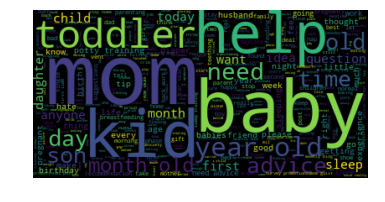

In [327]:
## Create word cloud
all_words = []
for bodytext in new_data['title']:
    all_words = all_words + preprocess(bodytext)
all_text = " ".join(all_words)
wordcloud = WordCloud(max_words=5000,margin=0).generate(all_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Word count analysis (simple display)

In [328]:
all_words = []
for bodytext in new_data['body']:
    all_words = all_words + preprocess(bodytext)
    
word_list = {}
for word in all_words:
    if word.isalpha():
            if word in word_list:
                word_list[word] += 1
            else:
                word_list[word] = 1
                
sorted_word_list = sorted(word_list.items(),key = operator.itemgetter(1), reverse=True)
sorted_word_list[10:40]

[('son', 308),
 ('would', 296),
 ('husband', 281),
 ('go', 279),
 ('really', 278),
 ('kids', 254),
 ('day', 242),
 ('year', 241),
 ('home', 238),
 ('little', 238),
 ('going', 236),
 ('sleep', 230),
 ('much', 229),
 ('back', 222),
 ('mom', 218),
 ('months', 214),
 ('help', 214),
 ('even', 208),
 ('work', 206),
 ('first', 201),
 ('think', 196),
 ('night', 194),
 ('need', 191),
 ('anyone', 183),
 ('daughter', 172),
 ('ll', 170),
 ('two', 167),
 ('month', 167),
 ('still', 165),
 ('doesn', 162)]

## Word occurence over time

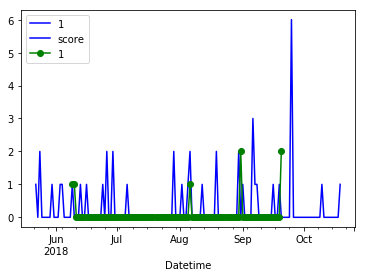

In [440]:
def word_occurence_ts(data,test_word):
    tslist = []
    for i,bodytext in enumerate(data):
        for word in preprocess(bodytext):
            if word == test_word:
                tslist.append((topics_data['timestamp'][i],1))

    df1 = pd.DataFrame(tslist)
    df1['Datetime'] = pd.to_datetime(df1[0])
    df1 = df1.set_index('Datetime')
    df1 = df1.resample('D').sum()
    return df1
    
df_new = word_occurence_ts(new_data['body'],'anxiety')
df_top = word_occurence_ts(top_data['body'],'anxiety')
df_hot = word_occurence_ts(hot_data['body'],'anxiety')

fig, ax = plt.subplots()
df_new.plot(ax = ax,color = 'b')
df_top.plot(ax = ax,color = 'g',marker = 'o')
#df_hot.plot(ax = ax, color = 'r',marker = 'v',linestyle = '')

/home/asya/anaconda2/envs/py37/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


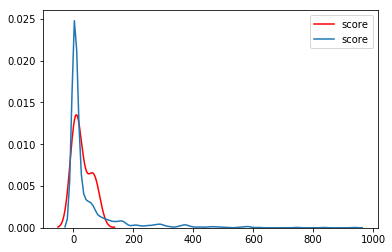

In [514]:
def word_occurence_col(data,test_word):
    tslist = list()
    flag = False
    for i,bodytext in enumerate(data):
        for word in preprocess(bodytext):
            if word == test_word:
                flag = True
        if flag: tslist.append(1)
        else: tslist.append(0)
        flag = False
    return tslist
new_data['anxiety_count'] = word_occurence_col(new_data['body'],'depression')

#new_data.plot.scatter(x = 'score', y = 'anxiety_count')
import seaborn as sns
sns.kdeplot((new_data.score[new_data['anxiety_count'] == 1]),color = 'r')
sns.kdeplot((new_data.score[new_data['anxiety_count'] == 0]))

## Classification of posts

In [401]:
def preprocess_nosplit(data):
    reviews_tokens = []
    for review in data:
        review = review.lower() #Convert to lower-case words
        raw_word_tokens = re.findall(r'(?:\w+)', review,flags = re.UNICODE) #remove puntuaction
        word_tokens = [w for w in raw_word_tokens if not w in stop_words] # do not add stop words
        reviews_tokens.append(word_tokens)
    return reviews_tokens #return all tokens

In [402]:
def construct_bag_of_words(data):
    bag_of_words = {}
    word_count = 0
    corpus =  preprocess_nosplit(data)
    for sentence in corpus:
        for word in sentence:
            if word not in bag_of_words: # do not allow repetitions
                bag_of_words[word] = word_count #set indexes
                word_count+=1
    return bag_of_words #index of letters

bag_of_words = construct_bag_of_words(new_data['title'])

['combo', 'feeding']
['considering', 'going', 'back', 'work', 'staying', 'home', '4', 'years', 'total', 'time', 'kids']
['make', 'pink', 'october', 'early', 'prevention', 'lead', 'better', 'life']
['six', 'month', 'old', 'daughter', 'insists', 'tummy', 'sleeping']
['bedtime', 'co', 'sleeping', 'attachment', 'parenting']
['toddler', 'milk', 'allergy', 'pretty', 'sure', 'lactose']
['terrified']
['tiny', 'monster']
['wine', 'breastfeeding']
['m', 'conflicted', 'playpen', 'advice']
['help', 'toddler', 'says', 'make', 'sad']
['2', 'lo']
['birthday', 'party', 'rant']
['baby', 'know', 'm', 'mom']
['get', '1', 'year', 'old', 'let', 'brush', 'teeth']
['diaper', 'leaking', 'help']
['silent', 'reflux', 'twin', 'boys']
['great', 'hfm', 'plague', '2018']
['sister', 'irl', 'back']
['husband', 'discussing', '2', '4', 'year', 'olds', 'manipulators', 'bedtime', 'think', 'kids', 'pre', 'k', 'years', 'thinks', 'kids', 'smart', 'little', 'buggers', 'super', 'smart', 'like', 'every', 'small', 'human', 'bed

In [406]:
def featurize(sentence_tokens,bag_of_words):
    sentence_features = [0 for x in range(len(bag_of_words))]
    for word in sentence_tokens:
        index = bag_of_words[word]
        sentence_features[index] +=1
    return sentence_features

def get_batch_features(data,bag_of_words):
    batch_features = []
    reviews_text_tokens = preprocess_nosplit(data)
    for review_text in reviews_text_tokens:
        feature_review_text = featurize(review_text,bag_of_words)
        batch_features.append(feature_review_text)
    return batch_features
 
batch_features = get_batch_features(new_data['title'],bag_of_words)

In [423]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(new_data['title'])

true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")


Top terms per cluster:
Cluster 0:
 old
 baby
 year
 month
 just
 child
 son
 did
 kid
 question
Cluster 1:
 potty
 training
 advice
 help
 trained
 night
 year
 argument
 easiest
 adventure
Cluster 2:
 help
 sleep
 old
 year
 month
 nap
 baby
 waking
 training
 daughter
Cluster 3:
 toddler
 tips
 bed
 hitting
 night
 help
 food
 wants
 disciplining
 stay
Cluster 4:
 new
 make
 reddit
 mom
 easier
 better
 smiles
 baby
 friends
 son
Cluster 5:
 needed
 advice
 today
 exhausted
 humor
 morning
 care
 air
 good
 airplanes
Cluster 6:
 need
 advice
 help
 vent
 baby
 friend
 leave
 outside
 sleep
 post
Cluster 7:
 time
 mom
 finding
 right
 make
 moms
 having
 hard
 bath
 freaking
Cluster 8:
 mom
 guilt
 feel
 like
 know
 teen
 just
 hate
 good
 advice
Cluster 9:
 kids
 moms
 working
 did
 ve
 questions
 like
 children
 think
 babies




In [427]:
from hmmlearn import hmm
import numpy as np
from sklearn import datasets

#HMM Model
gm = hmm.GaussianHMM(n_components=3)
gm.fit(ts_data.reshape(-1, 1))
states = gm.predict(ts_data.reshape(-1, 1))

#Plot
color_dict = {0:"r",1:"g",2:"b"}
color_array = [color_dict[i] for i in states]
plt.scatter(range(len(ts_data)), ts_data, c=color_array)
plt.title("HMM Model")

ValueError: could not convert string to float: "Just in case you're wondering what life is like with 3 kids"

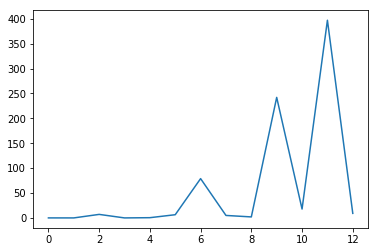

In [429]:
plt.plot(ts_data.reshape(-1, 1))